# Training with mobilenet

- New environment for tf 1.15
- Pip/Conda install numpy, matplotlib, pandas, jupyterlab, keras

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

#import tensorflow as tf

#tf.keras.backend.clear_session()  # For easy reset of notebook state.


In [2]:
import tensorflow

In [3]:
import tensorflow as tf
print(tf.__version__)

1.15.0


In [4]:
import keras

Using TensorFlow backend.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

# Simply load reshaped data

In [8]:
#os.chdir("C:/Users/Alicia/Desktop/new train data")

train_converted = np.load('train_data_converted2.npy', allow_pickle=True)
test_converted = np.load('test_data_converted2.npy', allow_pickle=True)
train_label_converted = np.load('new_train_label2sigmoid.npy', allow_pickle=True)
test_label_converted = np.load('new_test_label2sigmoid.npy', allow_pickle=True)

In [9]:
print(train_converted.shape)
print(test_converted.shape)
print(train_label_converted.shape)
print(test_label_converted.shape)

(6737, 224, 224, 3)
(1684, 224, 224, 3)
(6737, 4)
(1684, 4)


# Model

In [8]:
from keras.models import Sequential

In [9]:
from keras.applications import MobileNet

In [10]:
mobile = keras.applications.mobilenet.MobileNet()
# copy of pretrained MobileNet pretrained model with saved weights












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
mobile.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [12]:
from keras.models import Model
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout

In [13]:
from keras.layers import Reshape
from keras.layers import Conv2D

In [14]:
from keras.layers import Activation

In [ ]:
model = MobileNet(include_top=False, input_shape=(224,224,3))

# freeze layers after first 11 layers of the network to be non-trainable
for layer in model.layers[11:]: 
    layer.trainable=False
# set the first 11 layers of the network to be trainable, i.e. 1st block conv (full, depthwise, pointwise)
for layer in model.layers[:11]:
    layer.trainable=True

x = GlobalAveragePooling2D()(model.output)

class1 = Reshape((1,1,1024))(x) 
class2 = Dropout(0.25)(class1) # original 0.001
class3 = Conv2D(filters=4, kernel_size=(1,1), padding='same', data_format='channels_last')(class2) # (None,1,1,4)
class4 = Reshape((4,))(class3) # (None,4)
class5 = Activation('softmax')(class4)

model = Model(inputs=model.inputs, outputs=class5)
model.summary()

In [15]:
model = MobileNet(include_top=False, input_shape=(224,224,3))
#for layer in model.layers:
 #   layer.trainable = False
    
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[11:]: #[11:81]: freeze layers of 13 
    layer.trainable=False 
for layer in model.layers[:11]: #and model.layers[81:]: freeze layers of 13
    layer.trainable=True 

#flat1 = Flatten()(model.outputs)
#class1 = Dense(1024, activation='relu')(flat1)
x = GlobalAveragePooling2D()(model.output)

class1 = Reshape((1,1,1024))(x) # None,1,1,4
class2 = Dropout(0.25)(class1) # original 0.001, instead of 0.20, try 0.25 # there's overfit for sigmoid
class3 = Conv2D(filters=4, kernel_size=(1,1), padding='same', data_format='channels_last')(class2) # original 1,1 instead of 3,3, softmax instead of relu









#class4 = Reshape((-1,4))(class3) # None,1,4

#new_dim = tuple([x for x in class3.shape.as_list() if x != 1 and x is not None])
#class4 = Reshape(new_dim)(class3) # (4,)








class4 = Reshape((4,))(class3)
#class5 = Activation('softmax')(class4)


class5 = Dense(4, activation='sigmoid')(class4)




#class1 = Dense(1024, activation='relu')(x)
#class2 = Dropout(0.25)(class1)
#class3 = Dense(512, activation='relu')(class2)
#class4 = Dropout(0.5)(class3)

#output = Dense(4, activation='softmax')(class4)

#model = Model(inputs=model.inputs, outputs=class5)
model = Model(inputs=model.inputs, outputs=class5)
model.summary()

# model.add(Dense(30, input_dim=60, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [16]:
# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001988796DCC8> True
<keras.layers.convolutional.ZeroPadding2D object at 0x000001988796D688> True
<keras.layers.convolutional.Conv2D object at 0x000001988795A3C8> True
<keras.layers.normalization.BatchNormalization object at 0x000001988793FCC8> True
<keras.layers.advanced_activations.ReLU object at 0x00000198878E2DC8> True
<keras.layers.convolutional.DepthwiseConv2D object at 0x0000019887942448> True
<keras.layers.normalization.BatchNormalization object at 0x000001988797E748> True
<keras.layers.advanced_activations.ReLU object at 0x0000019886879AC8> True
<keras.layers.convolutional.Conv2D object at 0x000001988689F848> True
<keras.layers.normalization.BatchNormalization object at 0x00000198868AC708> True
<keras.layers.advanced_activations.ReLU object at 0x00000198868B9688> True
<keras.layers.convolutional.ZeroPadding2D object at 0x00000198868DE8C8> False
<keras.layers.convolutional.DepthwiseConv2D object at 0x00000198868E7EC8> False
<ke

In [20]:
import tensorflow

In [21]:
from tensorflow.python.platform import build_info
print('Tensorflow version: {} \nKeras version: {} \nCUDA version: {} \ncuDNN version: {}'.format(tensorflow.__version__,
                                                                                                 keras.__version__,
                                                                                                 build_info.cuda_version_number,
                                                                                                 build_info.cudnn_version_number))

Tensorflow version: 1.15.0 
Keras version: 2.2.4 
CUDA version: 10.0 
cuDNN version: 7


Secondly, we shall check if Tensorflow has detected the GPU on your system. Running the next block should return an entry with `device_type: "GPU"`.

In [22]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14943540473770986819, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 10051747840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 3624114045640516144
 physical_device_desc: "device: 0, name: TITAN Xp, pci bus id: 0000:02:00.0, compute capability: 6.1"]

Thirdly, we shall check if Tensorflow can <i> access </i> the GPU found in the previous block. Running the next block should return `True`.

In [23]:
tensorflow.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None)

True

Lastly, we shall verify if Keras (the high-level API running Tensorflow as the backend) will be running with the GPU (where possible). The output should read something like `['/job:localhost/replica:0/task:0/device:GPU:0']`.

In [24]:
keras.backend.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [17]:
from keras.optimizers import Adam 
opt = Adam(lr=0.0001)

# keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [18]:
#model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=["accuracy"])
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=["accuracy"])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [19]:
training = model.fit(train_converted, train_label_converted, epochs=20, validation_data= (test_converted, test_label_converted), verbose = 1)



Train on 6737 samples, validate on 1684 samples
Epoch 1/20
6737/6737 [==============================] - 1907s 283ms/step - loss: 0.5237 - acc: 0.7484 - val_loss: 0.4853 - val_acc: 0.7540
Epoch 2/20
6737/6737 [==============================] - 1988s 295ms/step - loss: 0.3439 - acc: 0.8656 - val_loss: 0.4045 - val_acc: 0.8444
Epoch 3/20
6737/6737 [==============================] - 2329s 346ms/step - loss: 0.2745 - acc: 0.8946 - val_loss: 0.3694 - val_acc: 0.8676
Epoch 4/20
6737/6737 [==============================] - 2345s 348ms/step - loss: 0.2285 - acc: 0.9171 - val_loss: 0.3426 - val_acc: 0.8796
Epoch 5/20
6737/6737 [==============================] - 2519s 374ms/step - loss: 0.1965 - acc: 0.9301 - val_loss: 0.3047 - val_acc: 0.8965
Epoch 6/20
6737/6737 [==============================] - 2286s 339ms/step - loss: 0.1744 - acc: 0.9391 - val_loss: 0.2998 - val_acc: 0.8947
Epoch 7/20
6737/6737 [==============================] - 2338s 347ms/step - loss: 0.1535 - acc: 0.9471 - val_loss: 0.

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

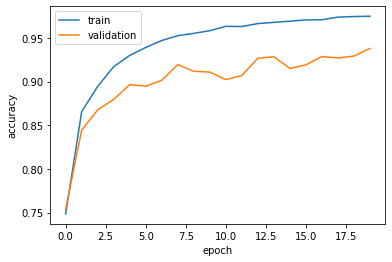

In [21]:

# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [22]:
test_loss, test_acc = model.evaluate(test_converted, test_label_converted)

print("Tested Acc:", test_acc)

1684/1684 [==============================] - 257s 153ms/step
Tested Acc: 0.9380938242280285


In [23]:
predictions = model.predict(test_converted)

In [24]:
#print(train_label[1228]) # 0 to 268, 269 to 619, 620 to 1227, 1228 to 2405
#print(train_label.shape) # 2406

#print(test_label[308]) # 0 to 67, 68 to 155, 156 to 307, 308 to 602
#print(test_label.shape) # 603

print(predictions[0], np.argmax(predictions[0]))

print(predictions[44], np.argmax(predictions[44]))

print(predictions[80], np.argmax(predictions[80]))

print(predictions[122], np.argmax(predictions[122]))

print(predictions[200], np.argmax(predictions[200]))

print(predictions[250], np.argmax(predictions[250]))

print(predictions[300], np.argmax(predictions[300]))

print(predictions[500], np.argmax(predictions[500]))

print(predictions[503], np.argmax(predictions[503]))

print(predictions[602], np.argmax(predictions[602]))

[0.36232042 0.05764505 0.01065293 0.29252642] 0
[0.17720419 0.31053632 0.1663022  0.04169399] 1
[0.13201025 0.07759103 0.07802784 0.04481226] 0
[0.67357445 0.09672165 0.00342965 0.22860023] 0
[0.03090149 0.8136387  0.00881296 0.1893757 ] 1
[0.00898337 0.80734575 0.10414138 0.15772584] 1
[0.01371017 0.9632809  0.01005551 0.07947138] 1
[0.01061946 0.2785035  0.84128493 0.01104501] 2
[0.02084357 0.27368703 0.90106344 0.00627911] 2
[7.6130033e-04 1.0283443e-01 9.7165948e-01 4.4094920e-03] 2


In [25]:
prediction_labels = []

for i in range(1684):
    prediction_labels.append(np.argmax(predictions[i]))

In [26]:
def confusion_matrix(test_label, predicted_label):
    cm = np.zeros(shape=(4,4))
    
    for i in range(1684):
        cm[int(np.argmax(test_label[i])), int(predicted_label[i])] += 1
        
    cm[0,:] = cm[0,:]/sum(cm[0,:])
    cm[1,:] = cm[1,:]/sum(cm[1,:])
    cm[2,:] = cm[2,:]/sum(cm[2,:])
    cm[3,:] = cm[3,:]/sum(cm[3,:])
    
    return cm
    

In [27]:
cm = confusion_matrix(test_label_converted, prediction_labels)
print(cm)

[[0.80745342 0.06832298 0.0621118  0.0621118 ]
 [0.02066116 0.97107438 0.00413223 0.00413223]
 [0.002457   0.06388206 0.92628993 0.00737101]
 [0.         0.01601831 0.01487414 0.96910755]]


In [28]:
model.save("trained_mobilenet_2sigmoid3.h5")

# Load model

In [6]:
loaded_model = keras.models.load_model('trained_mobilenet_2sigmoid3.h5')












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




In [7]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [39]:
predictions = loaded_model.predict(test_converted)

In [40]:
#print(train_label[1228]) # 0 to 268, 269 to 619, 620 to 1227, 1228 to 2405
#print(train_label.shape) # 2406

#print(test_label[308]) # 0 to 67, 68 to 155, 156 to 307, 308 to 602
#print(test_label.shape) # 603

print(predictions[0], np.argmax(predictions[0]))

print(predictions[44], np.argmax(predictions[44]))

print(predictions[80], np.argmax(predictions[80]))

print(predictions[122], np.argmax(predictions[122]))

print(predictions[200], np.argmax(predictions[200]))

print(predictions[250], np.argmax(predictions[250]))

print(predictions[300], np.argmax(predictions[300]))

print(predictions[500], np.argmax(predictions[500]))

print(predictions[503], np.argmax(predictions[503]))

print(predictions[602], np.argmax(predictions[602]))

[0.63417435 0.04833587 0.06494177 0.25254798] 0
[0.8295751  0.08056274 0.04428603 0.0455761 ] 0
[0.4945213  0.08632442 0.15080382 0.2683505 ] 0
[0.7791041  0.16179712 0.00856867 0.05053012] 0
[0.0374164  0.87216645 0.00547148 0.08494562] 1
[0.11929215 0.74862653 0.01534309 0.11673824] 1
[0.01300532 0.9799398  0.0019626  0.00509229] 1
[0.02279518 0.20453303 0.7181984  0.0544734 ] 2
[0.04270183 0.23348512 0.60674036 0.11707267] 2
[0.00218068 0.07137399 0.90116036 0.02528502] 2


In [41]:
prediction_labels = []

for i in range(1684):
    prediction_labels.append(np.argmax(predictions[i]))

In [42]:
def confusion_matrix(test_label, predicted_label):
    cm = np.zeros(shape=(4,4))
    
    for i in range(1684):
        cm[int(test_label[i]), int(predicted_label[i])] += 1
        
    cm[0,:] = cm[0,:]/sum(cm[0,:])
    cm[1,:] = cm[1,:]/sum(cm[1,:])
    cm[2,:] = cm[2,:]/sum(cm[2,:])
    cm[3,:] = cm[3,:]/sum(cm[3,:])
    
    return cm
    

In [43]:
cm = confusion_matrix(test_label_converted, prediction_labels)
print(cm)

[[0.88198758 0.04347826 0.         0.07453416]
 [0.03719008 0.94628099 0.         0.01652893]
 [0.02457002 0.10565111 0.83292383 0.03685504]
 [0.00457666 0.01029748 0.00457666 0.9805492 ]]


# Convert from keras model to tflite model

image_shape = (64,64,3)
list(image_shape)

image = tf.random.normal([1])

image

image = tf.random.normal([1]+list(image_shape))

image

data = np.float32(test_all)
data.shape

x = test_all[0]

y = np.expand_dims(x, axis=0)
y.shape

for j in range(100):
    print(6*j, j) 

In [10]:
test_all_spec = np.float32(test_converted)

def representative_dataset_gen():
    for i in range(100):
        data = test_all_spec[16*i]
        data_dim = np.expand_dims(data, axis=0)
        yield [data_dim]

In [11]:
# convert a tf.keras model to tflite model
converter = tensorflow.lite.TFLiteConverter.from_keras_model_file("trained_mobilenet_2sigmoid3.h5")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.compat.v1.graph_util.convert_variables_to_constants`
Instructions for updating:
Use `tf.compat.v1.graph_util.extract_sub_graph`
INFO:tensorflow:Froze 139 variables.
INFO:tensorflow:Converted 139 variables to const ops.


In [12]:
converter.optimizations = [tensorflow.lite.Optimize.DEFAULT]

In [13]:
converter.representative_dataset = tensorflow.lite.RepresentativeDataset(representative_dataset_gen)

In [14]:
converter.target_spec.supported_ops = [tensorflow.lite.OpsSet.TFLITE_BUILTINS_INT8] # For EdgeTPU, no float ops allowed
converter.inference_input_type = tensorflow.uint8
converter.inference_output_type = tensorflow.uint8


In [15]:
tflite_mobilenet_2sigmoid3 = converter.convert()

In [16]:
open('tflite_mobilenet_2sigmoid3.tflite', 'wb').write(tflite_mobilenet_2sigmoid3)

3511424

In [36]:
# Load TFLite model and allocate tensors.
interpreter = tensorflow.lite.Interpreter(model_path="tflite_mobilenet_2sigmoid3.tflite")
interpreter.allocate_tensors()

In [37]:
# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [38]:
input_details

[{'name': 'input_2',
  'index': 103,
  'shape': array([  1, 224, 224,   3]),
  'dtype': numpy.uint8,
  'quantization': (0.5391271114349365, 113)}]

In [39]:
output_details

[{'name': 'dense_1/Sigmoid',
  'index': 104,
  'shape': array([1, 4]),
  'dtype': numpy.uint8,
  'quantization': (0.00390625, 0)}]

input_shape = input_details[0]['shape'] # array([  1, 224, 224,   3])
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)
x = np.random.random_sample(input_shape)
x.shape

input_shape = (1,2,2,3)
x = np.random.random_sample(input_shape)
x

print(test_all[300], test_label[300])

x = np.expand_dims(test_all[300], axis=0)
print(x.shape)

# Test model on random input data.

# input_shape = input_details[0]['shape']
# input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)
input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

print('ground truth:', test_label[300], 'pred:', np.argmax(output_data))

# TEST HERE

In [40]:
x = np.expand_dims(test_converted[100], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[100], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[71  5  8 12]]
ground truth: [1 0 0 0] pred: 0


In [41]:
x = np.expand_dims(test_converted[200], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[200], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[60 96  1 26]]
ground truth: [0 1 0 0] pred: 1


In [42]:
x = np.expand_dims(test_converted[600], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[600], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[  0   4 188  22]]
ground truth: [0 0 1 0] pred: 2


In [43]:
x = np.expand_dims(test_converted[1000], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[1000], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[ 3 44  4 77]]
ground truth: [0 0 0 1] pred: 3


In [44]:
x = np.expand_dims(test_converted[1200], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[1200], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[ 31  11   1 135]]
ground truth: [0 0 0 1] pred: 3


In [45]:
x = np.expand_dims(test_converted[1500], axis=0)
print(x.shape)

input_data = np.array(x, dtype=np.uint8)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)
print('ground truth:', test_label_converted[1500], 'pred:', np.argmax(output_data))

(1, 224, 224, 3)
[[90 12  3 93]]
ground truth: [0 0 0 1] pred: 3


In [ ]:
predictions_tflite = []

for i in range(1684):
    print(i)
    x = np.expand_dims(test_converted[i], axis=0)
    
    input_data = np.array(x, dtype=np.uint8)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    interpreter.invoke()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    splits_dict = {}
    splits_dict['predicted'] = np.argmax(output_data)
    splits_dict['ground truth'] = test_label_converted[i]
    
    predictions_tflite.append(splits_dict)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135


In [ ]:
predictions_tflite[0:2]

test_all.take(100)

# Gather results for randomly sampled test images
predictions = []

test_labels, test_data = [], []
for data, label in tqdm(test_all.take(10), dtype=np.uint8):
    interpreter.set_tensor(input_details[0]['index'], data)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_details[0]['index']))
    
    test_labels,append(label.numpy()[0])
    test_data.append(data)

# Create MobileNet model
#vgg_model = keras.applications.vgg16.VGG16(weights='imagenet')
mobile_model = keras.applications.mobilenet.MobileNet(weights='imagenet')

# Created model is of type Model
type(mobile_model)
#>> keras.engine.training.Model

# Convert it to Sequential
#model = Sequential() 
seq_model = Sequential()
for layer in mobile_model.layers:
   seq_model.add(layer)

# Now, check the model type, its Sequential! 
type(seq_model)
#>> keras.models.Sequential

# Verify the model details
seq_model.summary()

from keras.layers.core import Dense, Activation

# Now, that its sequential, we can perform usual operations.
seq_model.layers.pop()

# Freeze the layers 
for layer in seq_model.layers:
    layer.trainable = False

# Add 'softmax' instead of earlier 'prediction' layer.
seq_model.add(Dense(4, activation ='softmax'))

# Check the trainable status of the individual layers
for layer in seq_model.layers:
    print(layer, layer.trainable)

# Check the summary, and yes new layer has been added. 
seq_model.summary()

# Training model

seq_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=["accuracy"])

training = seq_model.fit(train_all, train_label, epochs=20, validation_data= (test_all, test_label), verbose = 1)

# summarize history for accuracy
plt.plot(training.history['acc'])
plt.plot(training.history['val_acc'])
# plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

test_loss, test_acc = seq_model.evaluate(test_all, test_label)

print("Tested Acc:", test_acc)

# View model predictions

predictions = seq_model.predict(test_all)

print(train_label[1228]) # 0 to 268, 269 to 619, 620 to 1227, 1228 to 2405
print(train_label.shape) # 2406

print(test_label[308]) # 0 to 67, 68 to 155, 156 to 307, 308 to 602
print(test_label.shape) # 603

print(predictions[0], np.argmax(predictions[0]))

print(predictions[44], np.argmax(predictions[44]))

print(predictions[80], np.argmax(predictions[80]))

print(predictions[122], np.argmax(predictions[122]))

print(predictions[200], np.argmax(predictions[200]))

print(predictions[250], np.argmax(predictions[250]))

print(predictions[300], np.argmax(predictions[300]))

print(predictions[500], np.argmax(predictions[500]))

print(predictions[503], np.argmax(predictions[503]))

print(predictions[602], np.argmax(predictions[602]))

# Save model

seq_model.save("trained_model_mobile.h5")

loaded_model = keras.models.load_model('trained_model_mobile.h5')

loaded_model.summary()

predictions = loaded_model.predict(test_all)

print(predictions[0], np.argmax(predictions[0]))

print(predictions[44], np.argmax(predictions[44]))

print(predictions[80], np.argmax(predictions[80]))

print(predictions[122], np.argmax(predictions[122]))

print(predictions[200], np.argmax(predictions[200]))

print(predictions[250], np.argmax(predictions[250]))

print(predictions[300], np.argmax(predictions[300]))

print(predictions[500], np.argmax(predictions[500]))

print(predictions[503], np.argmax(predictions[503]))

print(predictions[602], np.argmax(predictions[602]))

# Convert model

# convert a tf.keras model to tflite model
converter = tf.lite.TFLiteConverter.from_keras_model_file(seq_model)


converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_mobile = converter.convert()